No handles with labels found to put in legend.


[ 2.95000000e+000 -3.35000000e+000  1.95000000e+000 -4.35000000e+000
  9.50000000e-001 -5.35000000e+000 -5.00000000e-002 -6.35000000e+000
 -1.05000000e+000 -7.35000000e+000 -2.05000000e+000 -1.75000000e+000
 -1.75000000e+000 -1.75000000e+000 -1.75000000e+000 -1.75000000e+000
  6.97000000e+000  1.22700000e+001  5.97000000e+000  1.12700000e+001
  4.97000000e+000  1.02700000e+001  3.97000000e+000  9.27000000e+000
  2.97000000e+000  8.27000000e+000  1.97000000e+000  7.27000000e+000
  9.70000000e-001  6.27000000e+000 -3.00000000e-002  5.27000000e+000
 -1.03000000e+000  4.27000000e+000 -2.03000000e+000  2.29175545e-312
  2.10077583e-312  2.07955588e-312  2.05833592e-312  2.27053550e-312]


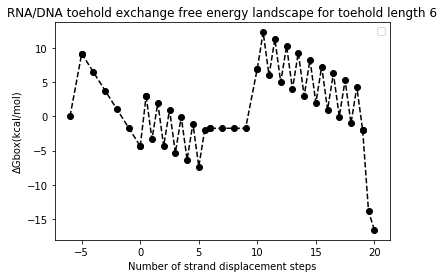

In [73]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#define the dGbox
g = 6
b = 20
g2 = 6
#position of the mismatch
m1 = 6
m2 = 10

R = 1.987/1000
temp = 298.15 
dGvol = 9.95 
dGassoc = 1.90
dGbp = -1.7
dGp = 2.0 
dGs= 5.3 
dGl = 0.48
#downhill slope 
dGrd = - 1
#mismatch penalty/benefit 
dGmm = 5.6
k_uni = 7.5*10**7
k_bi = 3*10**6


dGboxA = 0 
dGboxB1 = dGassoc + dGvol + dGbp + dGrd
dGboxBr = np.empty(g)
for to in range(g):
    #hybridisation of each base pair in the toehold is associated with dGbp as for DNA/DNA and now also an addition -1 for dGrd
    dGboxBr[to] = dGboxB1 + (dGbp + dGrd)*to
dGboxC1 = dGassoc + dGvol + (dGbp + dGrd)*g 
dGboxCh1 = dGboxC1 + dGp + dGs
dGboxCr = np.empty(m1)
dGboxCh = np.empty(m1)
dGboxCham1 = np.empty(m2-m1)
dGboxCram1 = np.empty(m2-m1)
dGboxCham2 = np.empty(b-m2-1)
dGboxCram2 = np.empty(b-m2-1)
for br in range(m1):
    dGboxCh[br] = dGboxCh1 + dGrd*br
    dGboxCr[br] = dGboxCh[br] - dGs + dGrd
    dGboxCrm1 = dGboxCh[m1-1] + (dGmm - dGs)
for br in range(m1, m2):   
    dGboxCram1[br-m1] = dGboxCrm1
    dGboxCrm2 = dGboxCram1[m2-m1-2] + dGs + ((m2-m1)*(-dGbp + dGl) - dGs)
for br in range(m2, b-1):
    dGboxCham2[br-m2] = dGboxCrm2 + dGs + dGrd*(br-m2)
    dGboxCram2[br-m2] = dGboxCham2[br-m2] - dGs + dGrd
dGboxD = dGboxCrm2 + dGrd*(b-m2-1)
dGboxE = dGboxD - dGassoc - dGvol 
dGboxF = dGboxE + dGbp + dGrd

dGboxC = np.empty(b*2)
dGboxC[0:m1*2] = [i for j in zip(dGboxCh, dGboxCr) for i in j]
dGboxC[m1*2-1] = dGboxCrm1
dGboxC[m1*2:m1*2 + (m2-m1)] = dGboxCram1
#dGboxC[m2*2-1] = dGboxCrm2
dGboxC[m1 + m2] = dGboxCrm2
dGboxC[m1 + m2 + 1: (b-1)*2 - (m2 - m1) + 1] = [i for j in zip (dGboxCham2, dGboxCram2) for i in j]
print(dGboxC)
#dGboxC[m2*2:(b-1)*2] = [i for j in zip(dGboxCham2, dGboxCram2) for i in j]
dGboxAB1 = [dGboxA, dGboxB1] 
dGboxC1Ch1 = [dGboxC1, dGboxCh1]

plt.figure()
plt.plot(range(-g,-g+2), dGboxAB1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
plt.plot(range(-g+1,1), dGboxBr, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(0.5, m1 + 0.5, 0.5), dGboxC[0:(m1*2)], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(range(m1, m2 + 1), dGboxC[m1*2 : m1*2 + (m2-m1)+1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
#plt.plot(np.arange(m2, b-0.5, 0.5), dGboxC[m2*2-1:(b-1)*2], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(m2, b-0.5, 0.5), dGboxC[(m1+ m2):(b-1)*2 - (m2-m1) + 1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot([b-1, b-0.5, b], [dGboxD, dGboxE, dGboxF],'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')


plt.xlabel('Number of strand displacement steps')
plt.ylabel('\u0394Gbox(kcal/mol)')
plt.title('RNA/DNA toehold exchange free energy landscape for toehold length ' + str(g))
plt.legend()
plt.show()


[0, 5.6, 7.779999999999999, 7.779999999999999, 7.779999999999999, 7.779999999999999, 7.779999999999999, 7.779999999999999, 7.779999999999999]
[0, 5.6, 5.6, 9.959999999999999, 9.959999999999999, 9.959999999999999, 9.959999999999999, 9.959999999999999, 9.959999999999999]
[0, 5.6, 5.6, 5.6, 12.139999999999999, 12.139999999999999, 12.139999999999999, 12.139999999999999, 12.139999999999999]
[0, 5.6, 5.6, 5.6, 5.6, 14.319999999999999, 14.319999999999999, 14.319999999999999, 14.319999999999999]
[0, 5.6, 5.6, 5.6, 5.6, 5.6, 16.5, 16.5, 16.5]
[0, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 18.68, 18.68]
[0, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 20.86]


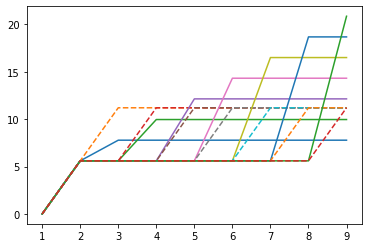

7.779999999999999
9.959999999999999
12.139999999999999
14.319999999999999
16.5
18.68
20.86


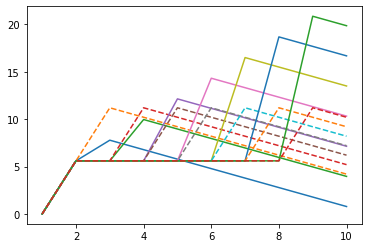

In [59]:
#DNA/DNA bubble formation free energy landscape 
m1 = 2
dGbubble = np.empty(8)
for d in range(1, 8):
    dGclosed = 2*dGmm;
    dGbubble[d-1] = dGmm + d*(-dGbp + dGl)
    
    dGb = [0]*(m1-1) + [dGmm]*d
    for x in range (d, 8):
        dGb.append(dGbubble[d-1])
    dGc = [0]*(m1-1) + [dGmm]*d + [2*dGmm]*(8-d)
    
    print(dGb)

    
    plt.plot(range(1, 10), dGb)
    plt.plot(range(1, 10), dGc, '--')
plt.show()

#RNA/DNA bubble formation free energy landscape
dGbubble = np.empty(8)
for d in range(1, 8):
    dGclosed = 2*dGmm;
    dGbubble[d-1] = dGmm + d*(-dGbp + dGl)
    
    dGb = [0]
    dGc = [0]
    for m in range(m1-2): 
        dGb.append(dGb[m-1] - 1)
        dGc.append(dGc[m-1] - 1)
    dGb = dGb + [dGmm]*d
    dGc = dGc + [dGmm]*d 
    dGb.append(dGbubble[d-1])
    dGc = dGc + [2*dGmm]
    print(dGbubble[d-1])
    for x in range (d, 8):
        dGb.append(dGb[-1] - 1)
        dGc.append(dGc[-1] - 1)
    
    
    plt.plot(range(1, 11), dGb)
    plt.plot(range(1, 11), dGc, '--')

No handles with labels found to put in legend.


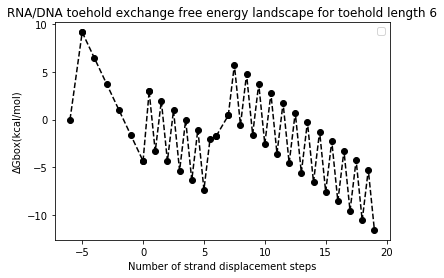

No handles with labels found to put in legend.


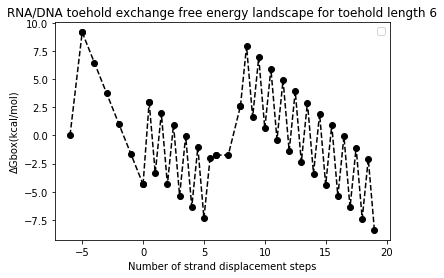

No handles with labels found to put in legend.


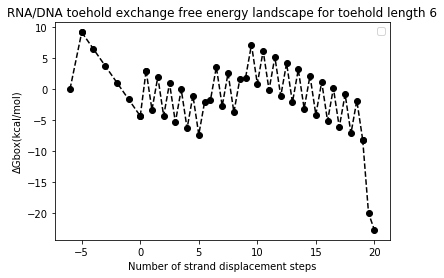

No handles with labels found to put in legend.


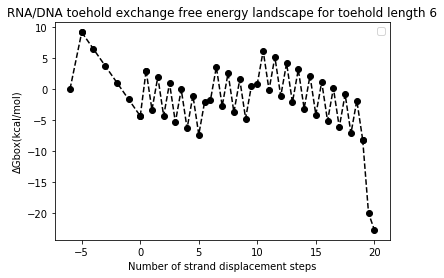

No handles with labels found to put in legend.


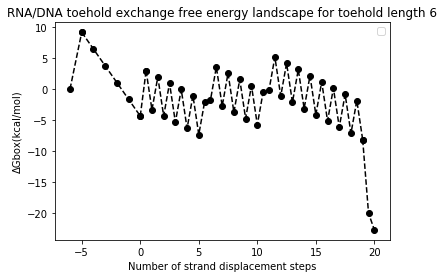

No handles with labels found to put in legend.


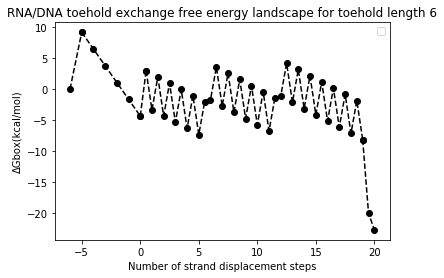

No handles with labels found to put in legend.


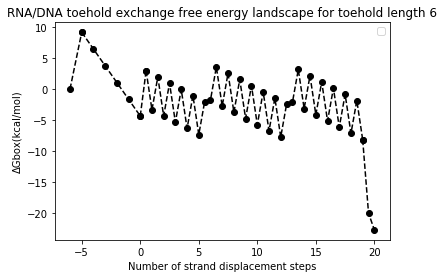

No handles with labels found to put in legend.


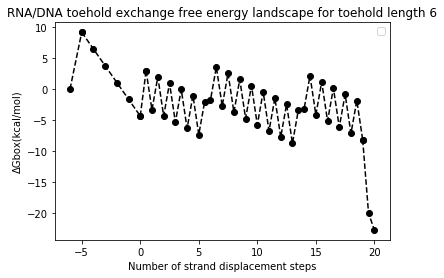

No handles with labels found to put in legend.


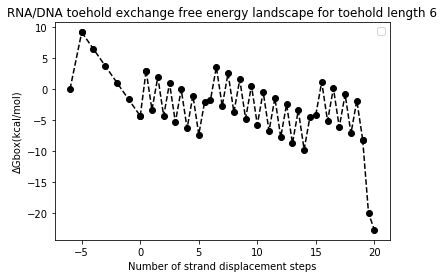

No handles with labels found to put in legend.


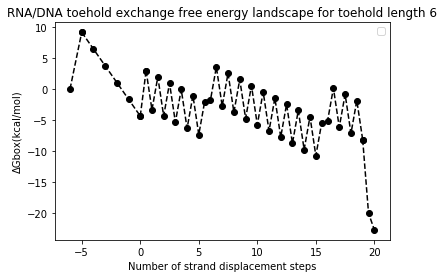

No handles with labels found to put in legend.


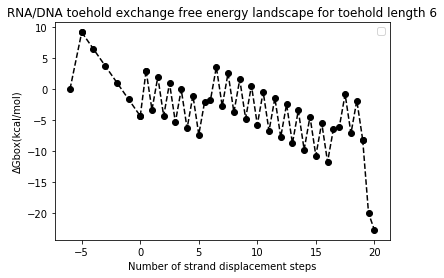

No handles with labels found to put in legend.


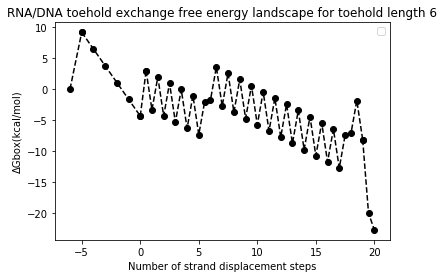

No handles with labels found to put in legend.


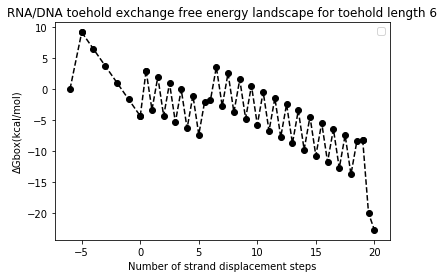

In [77]:
for m2 in range(7, b):
    dGboxA = 0 
    dGboxB1 = dGassoc + dGvol + dGbp + dGrd
    dGboxBr = np.empty(g)
    for to in range(g):
        #hybridisation of each base pair in the toehold is associated with dGbp as for DNA/DNA and now also an addition -1 for dGrd
        dGboxBr[to] = dGboxB1 + (dGbp + dGrd)*to
    dGboxC1 = dGassoc + dGvol + (dGbp + dGrd)*g 
    dGboxCh1 = dGboxC1 + dGp + dGs
    dGboxCr = np.empty(m1)
    dGboxCh = np.empty(m1)
    dGboxCham1 = np.empty(m2-m1)
    dGboxCram1 = np.empty(m2-m1)
    dGboxCham2 = np.empty(b-m2-1)
    dGboxCram2 = np.empty(b-m2-1)
    for br in range(m1):
        dGboxCh[br] = dGboxCh1 + dGrd*br
        dGboxCr[br] = dGboxCh[br] - dGs + dGrd
        dGboxCrm1 = dGboxCh[m1-1] + (dGmm - dGs)
    for br in range(m1, m2):   
        if m2-m1 < 3:
            dGboxCram1[br-m1] = dGboxCrm1
            dGboxCrm2 = dGboxCram1[m2-m1-2] + dGs + ((m2-m1)*(-dGbp + dGl) - dGs)
        else:
            dGboxCham1[br-m1] = dGboxCrm1 + dGs + dGrd*(br-m1)
            dGboxCram1[br-m1] = dGboxCham1[br-m1] - dGs + dGrd
            dGboxCrm2 = dGboxCram1[m2-m1-2] + dGs + (dGmm - dGs)
    for br in range(m2, b-1):
        dGboxCham2[br-m2] = dGboxCrm2 + dGs + dGrd*(br-m2)
        dGboxCram2[br-m2] = dGboxCham2[br-m2] - dGs + dGrd
    dGboxD = dGboxCrm2 + dGrd*(b-m2-1)
    dGboxE = dGboxD - dGassoc - dGvol 
    dGboxF = dGboxE + dGbp + dGrd

    dGboxC = np.empty(b*2)
    dGboxC[0:m1*2] = [i for j in zip(dGboxCh, dGboxCr) for i in j]
    dGboxC[m1*2-1] = dGboxCrm1
    if m2-m1 < 3: 
        dGboxC[m1*2:m1*2 + (m2-m1)] = dGboxCram1
        dGboxC[m1 + m2] = dGboxCrm2
        dGboxC[m1 + m2 + 1:(b-1)*2 - (m2 - m1) + 1] = [i for j in zip(dGboxCham2, dGboxCram2) for i in j]
    else: 
        dGboxC[m1*2:m2*2] = [i for j in zip(dGboxCham1, dGboxCram1) for i in j]
        dGboxC[m2*2-1] = dGboxCrm2
        dGboxC[m2*2:(b-1)*2] = [i for j in zip(dGboxCham2, dGboxCram2) for i in j]
    
    dGboxAB1 = [dGboxA, dGboxB1] 
    dGboxC1Ch1 = [dGboxC1, dGboxCh1]
    
    plt.figure()
    plt.plot(range(-g,-g+2), dGboxAB1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
    plt.plot(range(-g+1,1), dGboxBr, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    if m2-m1 < 3: 
        plt.plot(np.arange(0.5, m1 + 0.5, 0.5), dGboxC[0:(m1*2)], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
        plt.plot(range(m1, m2 + 1), dGboxC[m1*2 : m1*2 + (m2-m1)+1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
        plt.plot(np.arange(m2, b-0.5, 0.5), dGboxC[(m1+ m2):(b-1)*2 - (m2-m1) + 1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    else: 
        plt.plot(np.arange(0.5, b-0.5, 0.5), dGboxC[0:(b-1)*2], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
        plt.plot([b-1, b-0.5, b], [dGboxD, dGboxE, dGboxF],'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    
    
    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape for toehold length ' + str(g))
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


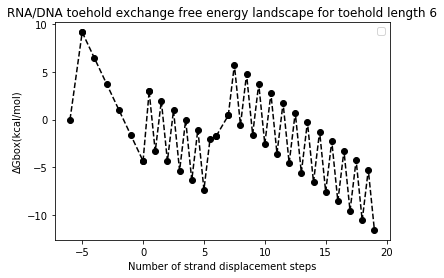

No handles with labels found to put in legend.


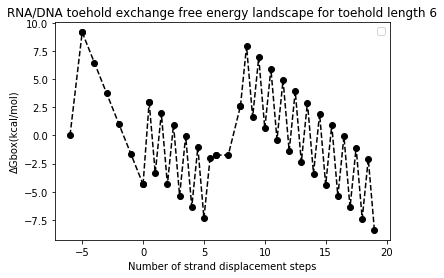

No handles with labels found to put in legend.


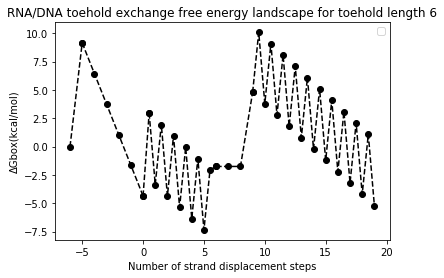

No handles with labels found to put in legend.


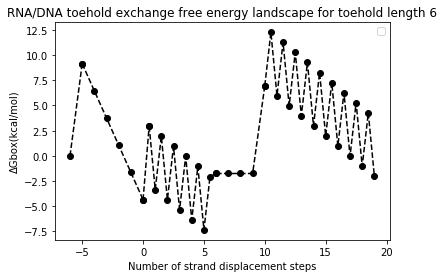

No handles with labels found to put in legend.


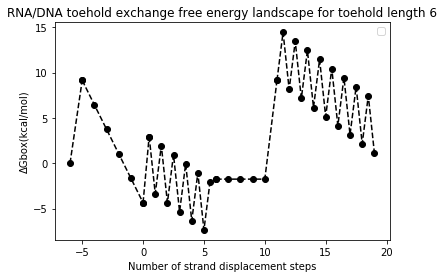

No handles with labels found to put in legend.


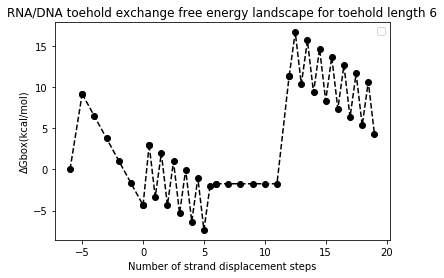

No handles with labels found to put in legend.


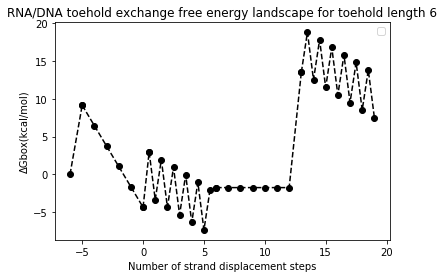

No handles with labels found to put in legend.


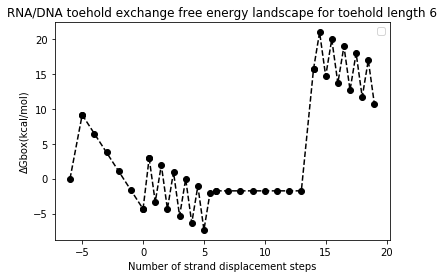

No handles with labels found to put in legend.


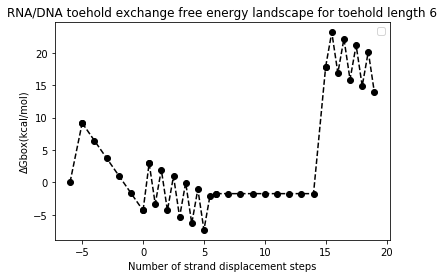

No handles with labels found to put in legend.


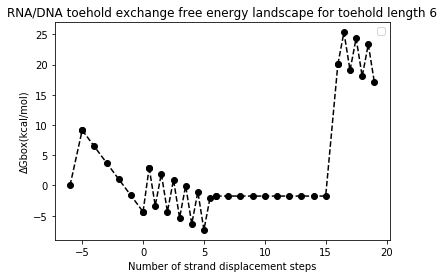

No handles with labels found to put in legend.


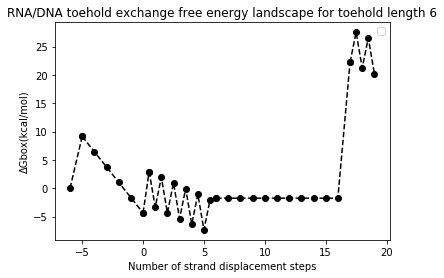

No handles with labels found to put in legend.


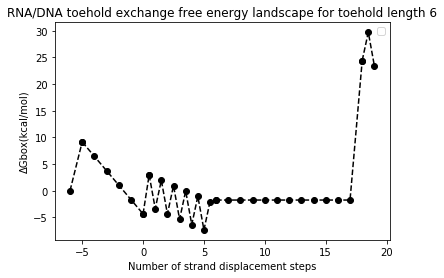

No handles with labels found to put in legend.


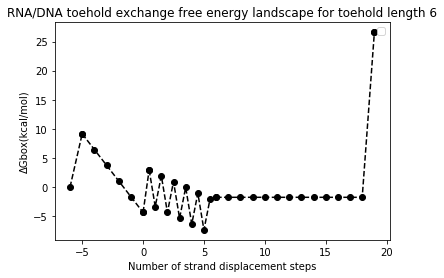

In [78]:
for m2 in range(7, b):
    dGboxA = 0 
    dGboxB1 = dGassoc + dGvol + dGbp + dGrd
    dGboxBr = np.empty(g)
    for to in range(g):
        #hybridisation of each base pair in the toehold is associated with dGbp as for DNA/DNA and now also an addition -1 for dGrd
        dGboxBr[to] = dGboxB1 + (dGbp + dGrd)*to
    dGboxC1 = dGassoc + dGvol + (dGbp + dGrd)*g 
    dGboxCh1 = dGboxC1 + dGp + dGs
    dGboxCr = np.empty(m1)
    dGboxCh = np.empty(m1)
    dGboxCham1 = np.empty(m2-m1)
    dGboxCram1 = np.empty(m2-m1)
    dGboxCham2 = np.empty(b-m2-1)
    dGboxCram2 = np.empty(b-m2-1)
    for br in range(m1):
        dGboxCh[br] = dGboxCh1 + dGrd*br
        dGboxCr[br] = dGboxCh[br] - dGs + dGrd
        dGboxCrm1 = dGboxCh[m1-1] + (dGmm - dGs)
    for br in range(m1, m2):   
        dGboxCram1[br-m1] = dGboxCrm1
        dGboxCrm2 = dGboxCram1[m2-m1-2] + dGs + ((m2-m1)*(-dGbp + dGl) - dGs)
    for br in range(m2, b-1):
        dGboxCham2[br-m2] = dGboxCrm2 + dGs + dGrd*(br-m2)
        dGboxCram2[br-m2] = dGboxCham2[br-m2] - dGs + dGrd
    dGboxD = dGboxCrm2 + dGrd*(b-m2-1)
    dGboxE = dGboxD - dGassoc - dGvol 
    dGboxF = dGboxE + dGbp + dGrd

    dGboxC = np.empty(b*2)
    dGboxC[0:m1*2] = [i for j in zip(dGboxCh, dGboxCr) for i in j]
    dGboxC[m1*2-1] = dGboxCrm1
    dGboxC[m1*2:m1*2 + (m2-m1)] = dGboxCram1
    dGboxC[m1 + m2] = dGboxCrm2
    dGboxC[m1 + m2 + 1:(b-1)*2 - (m2 - m1) + 1] = [i for j in zip(dGboxCham2, dGboxCram2) for i in j]
    
    dGboxAB1 = [dGboxA, dGboxB1] 
    dGboxC1Ch1 = [dGboxC1, dGboxCh1]
    
    plt.figure()
    plt.plot(range(-g,-g+2), dGboxAB1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
    plt.plot(range(-g+1,1), dGboxBr, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(0.5, m1 + 0.5, 0.5), dGboxC[0:(m1*2)], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(range(m1, m2 + 1), dGboxC[m1*2 : m1*2 + (m2-m1)+1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    plt.plot(np.arange(m2, b-0.5, 0.5), dGboxC[(m1+ m2):(b-1)*2 - (m2-m1) + 1], 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
    
    
    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape for toehold length ' + str(g))
    plt.legend()
    plt.show()